In [1]:
# import packages

from numpy import vander, transpose, invert, array, linspace, sum
from numpy.linalg import inv
import matplotlib.pyplot as plt
from random import uniform

In [2]:
# define function that calculates 
def polynomialRegression(x_coordinates: array, y_coordinates: array, degree: int) -> array :
    
    X = vander(x_coordinates, degree+1, increasing=True)
    y = transpose(y_coordinates)
    
    beta = inv(transpose(X) @ X) @ transpose(X) @ y
    error = 1/(2*x_coordinates.size) * sum(((X @ beta) - y_coordinates)**2)
    return beta, error

In [3]:
# number of training samples
N = 40

# random generation of training samples
x_coord = array([uniform(0,10) for _ in range(N)])
y_coord = array([uniform(0,10) for _ in range(N)])

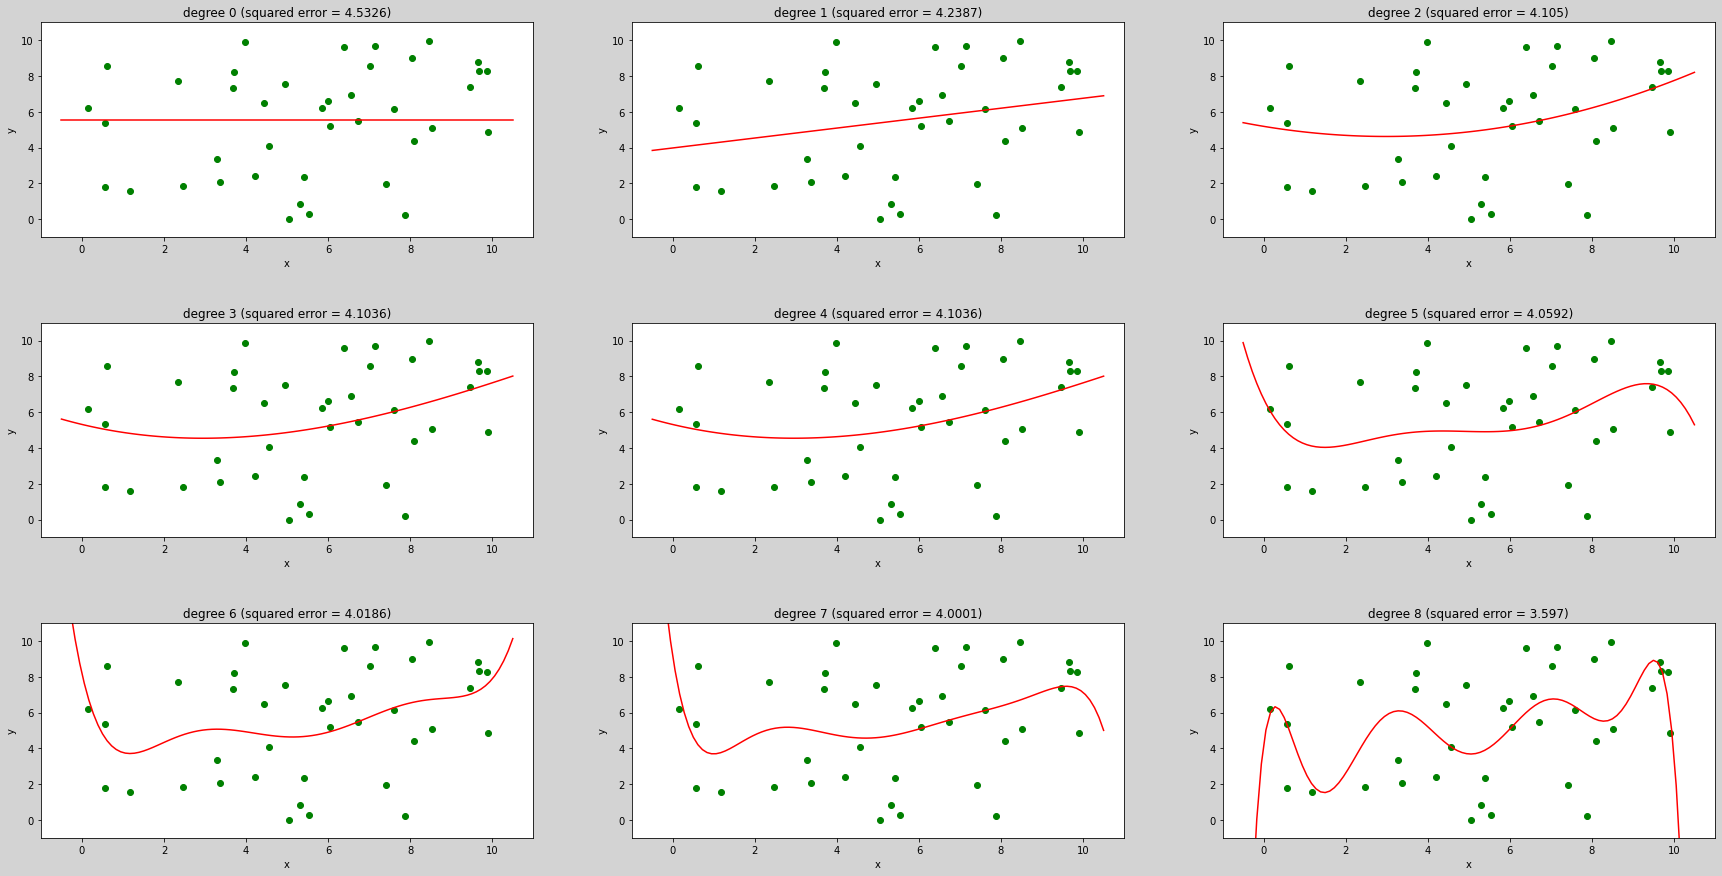

In [4]:
w = 3
h = 3

fig = plt.figure(figsize=(30,15), facecolor='lightgrey')

for i in range(w*h):
    degree = i
    beta, error = polynomialRegression(x_coord, y_coord, degree)
    x = linspace(-0.5,10.5, 100)
    y = vander(x, degree+1, increasing=True) @ beta
    
    plt.subplot(w,h,i+1)
    plt.title(f"degree {degree} (squared error = {round(error,4)})")
    plt.xlim(-1,11)
    plt.ylim(-1,11)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(x_coord, y_coord, color="green")
    plt.plot(x, y, color="red")

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()